##ES Rules

In [ ]:
install.packages('cowplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('extrafont')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’




In [ ]:
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
getwd()

[1] "/content"

In [ ]:
library(ggplot2)
library(cowplot)
library(extrafont)


Registering fonts with R



In [ ]:
font_import(path='/content')

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n] y


Scanning ttf files in /content ...

Extracting .afm files from .ttf files...

/content/Hoefler Text.ttf
 : HoeflerText-Regular already registered in fonts database. Skipping.

/content/HoeflerText.ttf
 : HoeflerText-Regular already registered in fonts database. Skipping.

/content/LIBERATOR-HEAVY.TTF
 => /usr/local/lib/R/site-library/extrafontdb/metrics/LIBERATOR-HEAVY

/content/LIBERATOR-LIGHT.TTF
 => /usr/local/lib/R/site-library/extrafontdb/metrics/LIBERATOR-LIGHT

Found FontName for 2 fonts.

Scanning afm files in /usr/local/lib/R/site-library/extrafontdb/metrics

Writing font table in /usr/local/lib/R/site-library/extrafontdb/fontmap/fonttable.csv

Writing Fontmap to /usr/local/lib/R/site-library/extrafontdb/fontmap/Fontmap...



In [ ]:
# Economically Significant Final Rules Published by Presidential Year

# clean environment
rm(list =ls())

# load packages
library(ggplot2)
library(dplyr)

# import data (this pathname must be manually updated, right click on file, hold option, and click copy "" as pathname, paste into read.csv("") below this text)
sig <- read.csv("/content/ES_rules_published_presidential_year_2023-03-28.csv")

# structure of data frame
str(sig)

# modify column names
colnames(sig) <- c("year", "econ", "excluding.withdrawn")

# delete excluding.withdrawn column
sig$excluding.withdrawn <- NULL

# remove rows with NA values
sig <- sig[complete.cases(sig), ]

# create party column (this must be manually updated with years of Democrat Presidents)
sig$party <- ifelse(sig$year %in% c(1993:2000, 2009:2016, 2021:2022), "dem", "rep")

# make party factor variable
sig$party <- as.factor(sig$party)

# generate bar graph
bar <- ggplot(sig, aes(x = year, y = econ, fill = party)) +
  geom_bar(stat = "identity", width= 0.5, color = "black") +
  scale_fill_manual(values = c("blue", "red")) +
  ggtitle("Economically Significant Final Rules Published by Presidential Year") +
  ylab("Number of Rules") +
  xlab("") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
        legend.position = "none")


'data.frame':	47 obs. of  3 variables:
 $ Presidential.Year..February.1...January.31.: chr  "1981" "1982" "1983" "1984" ...
 $ Economically.Significant.Rules.Published   : int  1 12 27 18 23 24 25 29 26 34 ...
 $ Excluding.Withdrawn                        : int  1 12 27 18 23 24 25 29 26 34 ...


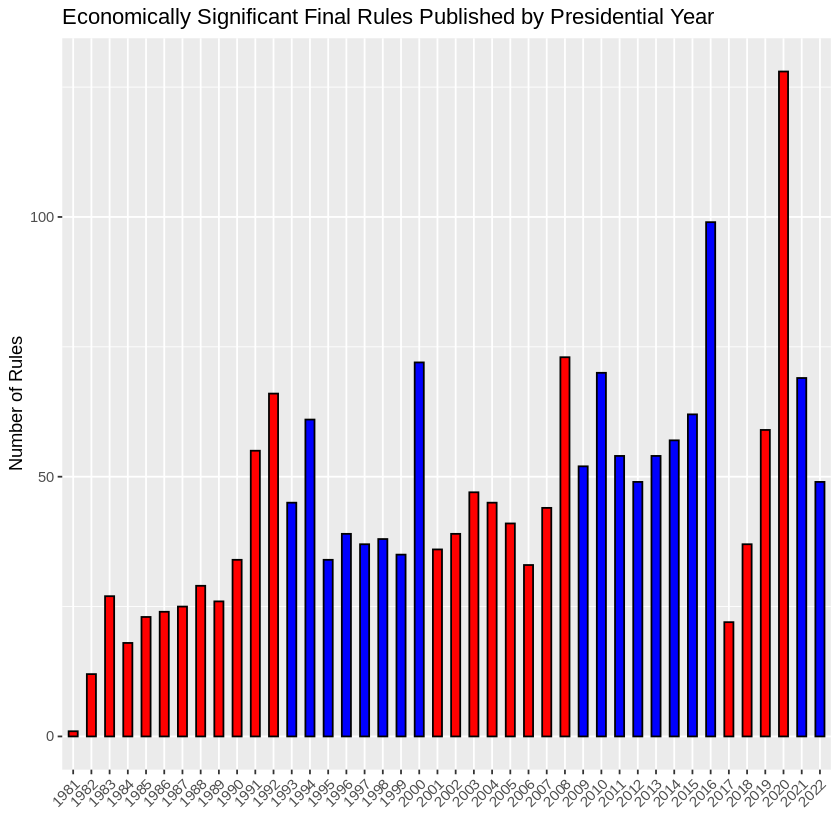

In [ ]:
# basic plot
bar

## Graph Modifiction

### Tasks

- Size of the plot (3129 × 2270)
- Title in center, fold to 2 lines?
- y-axis scale should show tick mark on every 25
- remove all grid only leave major grid (fixed)
- backgrounf color
- size of text
- insert logo
- annotation

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


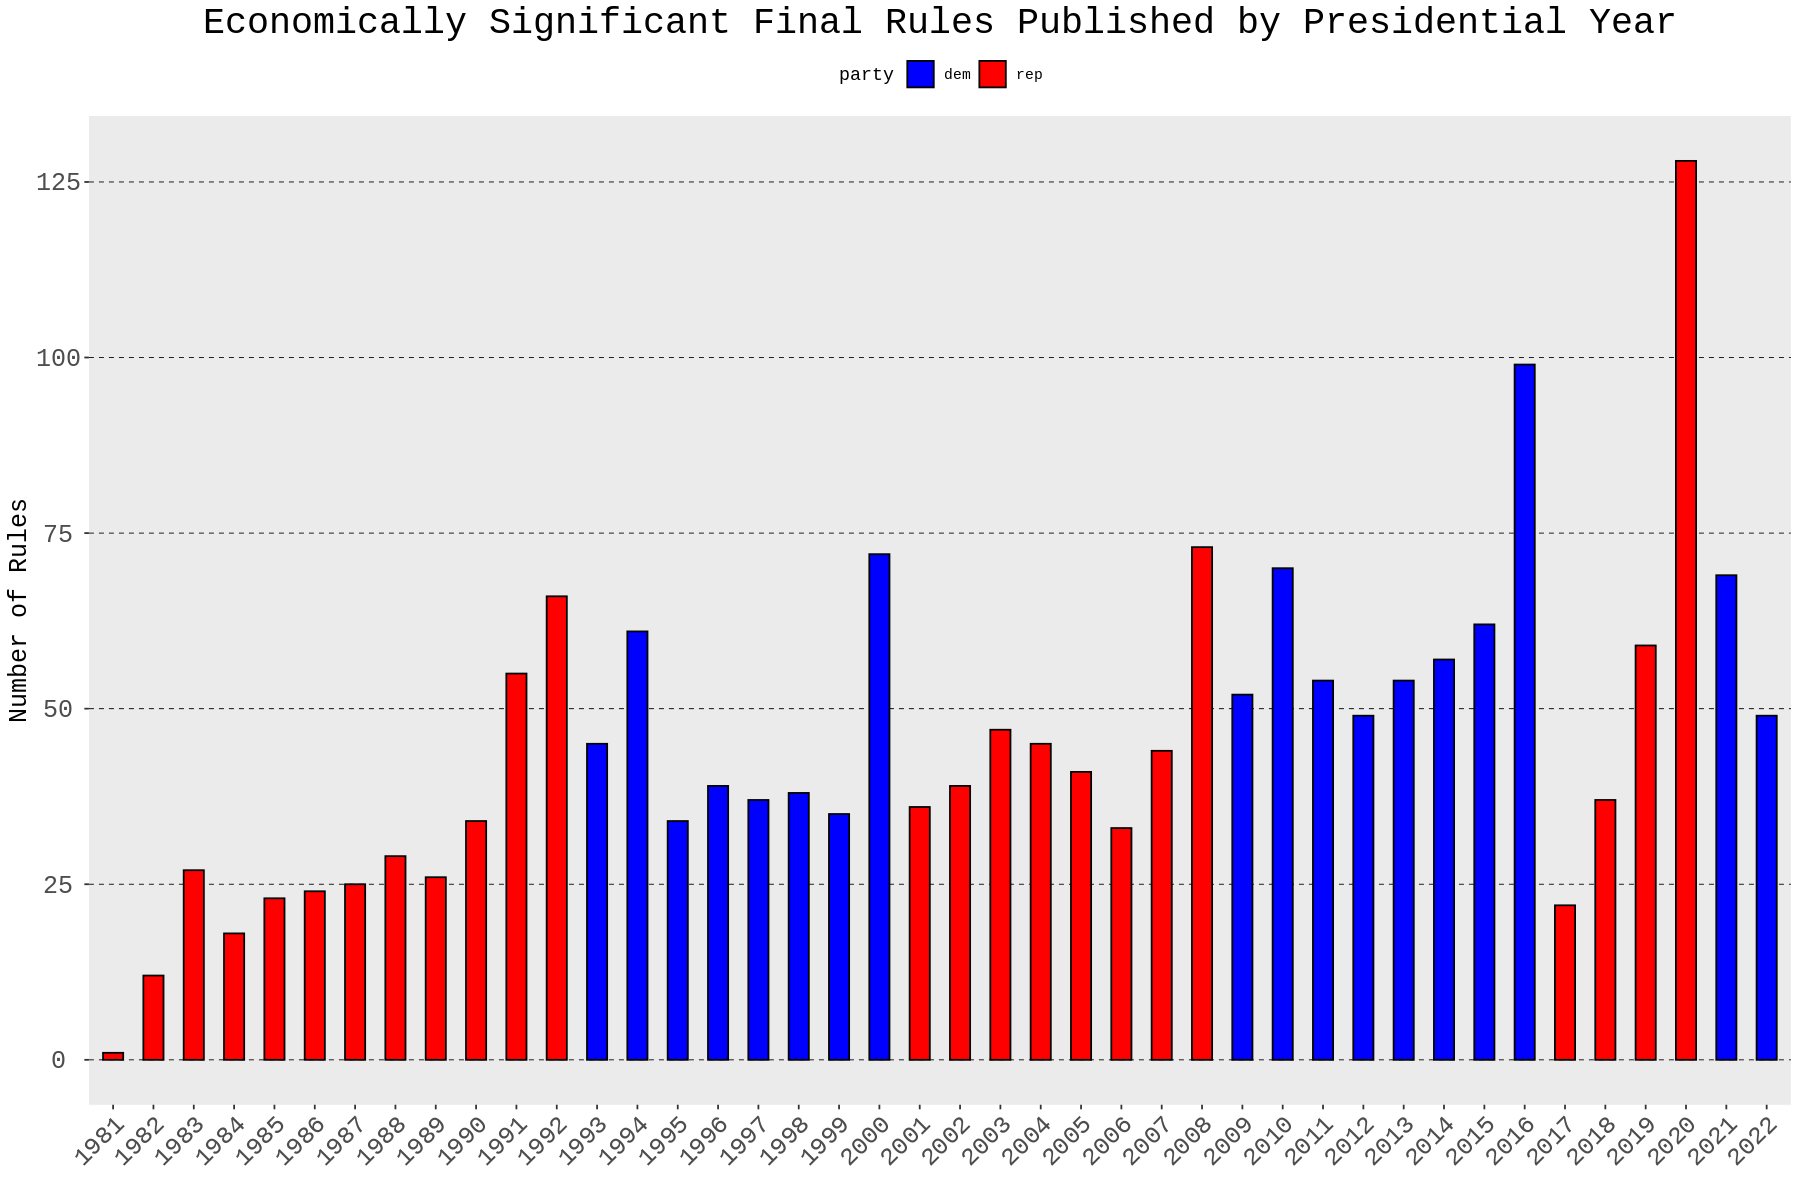

In [ ]:

ggplot(sig, aes(x = year, y = econ, fill = party)) +
  geom_bar(stat = "identity", width= 0.5, color = "black") +
  scale_fill_manual(values = c("blue", "red")) +
  ggtitle("Economically Significant Final Rules Published by Presidential Year") +
  ylab("Number of Rules") +
  xlab("")+
  ylim(0,150)+
  scale_y_continuous(breaks=seq(0,150,25))+
  theme(axis.text.x = element_text(angle = 45,size=15,hjust = 1, vjust = 1),
        axis.text.y = element_text(size=15,hjust = 0.5, vjust = 0.5),
        plot.title = element_text(hjust = 0.5,size=22),
        text =element_text(family = "HoeflerText"),
        legend.position = "top",
        #panel.grid.major = element_blank(),
        panel.grid = element_blank(),
        panel.grid.major.y = element_line(color = 1,
                                          linewidth = 0.25,
                                          linetype = 2),
        plot.background = element_rect(fill = "white"),
        axis.title.y = element_text(size = 15, angle = 90, vjust = 1))


#+coord_cartesian(ylim = c(0, 50))
#options(repr.plot.width=15, repr.plot.height=10)
